In [1]:
%%capture
!pip install auto-sklearn scikit-learn==0.22.2.post1
!pip install witwidget

In [2]:
import autosklearn.classification
import pandas as pd
from joblib import dump, load
import numpy as np
import tensorflow as tf
import witwidget
import glob
from witwidget.notebook.visualization import WitConfigBuilder
from witwidget.notebook.visualization import WitWidget

/opt/conda/lib/python3.7/site-packages/pyparsing.py:3174: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [3]:
def df_to_examples(df, columns=None):
    examples = []
    if columns == None:
        columns = df.columns.values.tolist()
    for index, row in df.iterrows():
        example = tf.train.Example()
        for col in columns:
            if df[col].dtype is np.dtype(np.int64):
                example.features.feature[col].int64_list.value.append(int(row[col]))
            elif df[col].dtype is np.dtype(np.float64):
                example.features.feature[col].float_list.value.append(row[col])
            elif row[col] == row[col]:
                example.features.feature[col].bytes_list.value.append(row[col].encode('utf-8'))
        examples.append(example)
    return examples    

In [4]:
models = []
for model_path in glob.glob("model_3cv/model_run_*"):
    models.append(load(model_path))

In [5]:
numeric_conv_cols = ['age', 'age_o', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',\
                    'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', \
                    'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', \
                    'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', \
                    'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', \
                     'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', \
                     'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', \
                     'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', \
                    'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'gender']

In [6]:
df = pd.read_csv("speeddating_reduced.csv").fillna(0)

In [7]:
df.head()

,has_null,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
0,0,1,21.0,27.0,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,...,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,0
1,0,1,21.0,22.0,1,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,...,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,0
2,1,1,21.0,22.0,1,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2.0,4.0,...,8.0,1.0,0.16,3.0,2.0,4.0,7.0,0.0,1.0,1
3,0,1,21.0,23.0,2,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,...,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,1
4,0,1,21.0,24.0,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2.0,4.0,...,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,1


In [8]:
X= df[numeric_conv_cols]
y= df['match']

In [9]:
test_examples = df_to_examples(df[numeric_conv_cols + ['match']])

In [10]:
def predict_for_model(idx, use_bad=False):
    model = bad_models[idx] if use_bad else models[idx] 
    return lambda inputs: custom_predict(inputs, model)
    
def custom_predict(inputs, model):
    model_inp = pd.DataFrame([{x:inputs[i].features.feature[x].float_list.value[0] 
                                if x != 'gender' else inputs[i].features.feature[x].int64_list.value[0]
                               for x in numeric_conv_cols} for i in range(len(inputs))])
    return model.predict_proba(model_inp)

In [11]:
config_builder = (WitConfigBuilder(test_examples, numeric_conv_cols + ['match'])
 .set_target_feature('match')
 .set_custom_predict_fn(predict_for_model(0))
 .set_model_type('classification'))
WitWidget(config_builder, height=600)

WitWidget(config={'model_type': 'classification', 'label_vocab': [], 'feature_names': ['age', 'age_o', 'import…

In [12]:
config_builder = (WitConfigBuilder(test_examples, numeric_conv_cols + ['match'])
 .set_target_feature('match')
 .set_custom_predict_fn(predict_for_model(1))
 .set_model_type('classification'))
WitWidget(config_builder, height=600)

WitWidget(config={'model_type': 'classification', 'label_vocab': [], 'feature_names': ['age', 'age_o', 'import…

In [13]:
config_builder = (WitConfigBuilder(test_examples, numeric_conv_cols + ['match'])
 .set_target_feature('match')
 .set_custom_predict_fn(predict_for_model(2))
 .set_model_type('classification'))
WitWidget(config_builder, height=600)

WitWidget(config={'model_type': 'classification', 'label_vocab': [], 'feature_names': ['age', 'age_o', 'import…

### Bad models

In [14]:
bad_models = []
for model_path in glob.glob("model_3cv/bad_auto_model_run_*"):
    bad_models.append(load(model_path))

In [15]:
config_builder = (WitConfigBuilder(test_examples, numeric_conv_cols + ['match'])
 .set_target_feature('match')
 .set_custom_predict_fn(predict_for_model(0, use_bad=True))
 .set_model_type('classification'))
WitWidget(config_builder, height=600)

WitWidget(config={'model_type': 'classification', 'label_vocab': [], 'feature_names': ['age', 'age_o', 'import…

In [16]:
config_builder = (WitConfigBuilder(test_examples, numeric_conv_cols + ['match'])
 .set_target_feature('match')
 .set_custom_predict_fn(predict_for_model(1, use_bad=True))
 .set_model_type('classification'))
WitWidget(config_builder, height=600)

WitWidget(config={'model_type': 'classification', 'label_vocab': [], 'feature_names': ['age', 'age_o', 'import…

In [17]:
config_builder = (WitConfigBuilder(test_examples, numeric_conv_cols + ['match'])
 .set_target_feature('match')
 .set_custom_predict_fn(predict_for_model(2, use_bad=True))
 .set_model_type('classification'))
WitWidget(config_builder, height=600)

WitWidget(config={'model_type': 'classification', 'label_vocab': [], 'feature_names': ['age', 'age_o', 'import…

### Nearest counterfactual analysis

In [18]:
from sklearn.neighbors import NearestNeighbors
distances = []
indices = []
certainties=[]
for idx, model in enumerate(models + bad_models):
    y_pred = model.predict_proba(X)
    X_no_match = X[y_pred[:,0]>y_pred[:,1]]
    X_match = X[y_pred[:,0]<=y_pred[:,1]]
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(X_no_match)
    d, i = nbrs.kneighbors(X_match)
    distances.append(d.flatten())
    indices.append(i.flatten())
    certainties.append(np.abs(y_pred[:,0] - y_pred[:,1])[y_pred[:,0]<=y_pred[:,1]])

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

[Text(0, 0, 'Fold 1'), Text(0, 0, 'Fold 2'), Text(0, 0, 'Fold 3')]

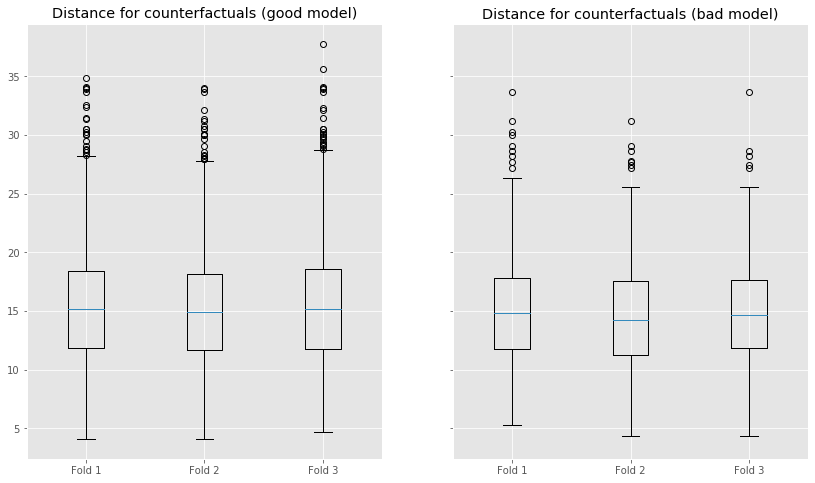

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,8), sharey=True)
ax1.set_title('Distance for counterfactuals (good model)')
ax1.boxplot(distances[:3])
ax1.set_xticklabels(['Fold ' + str(i) for i in range(1,4)])
ax2.set_title('Distance for counterfactuals (bad model)')
ax2.boxplot(distances[3:])
ax2.set_xticklabels(['Fold ' + str(i) for i in range(1,4)])

#### Compare certainty with cf-distance

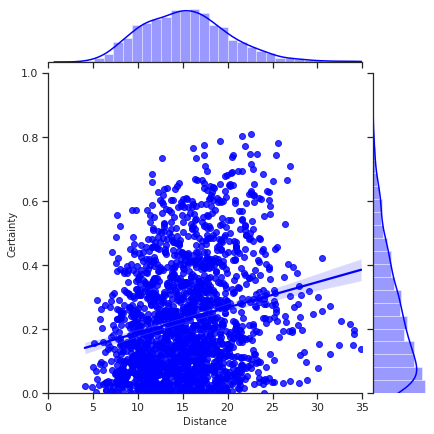

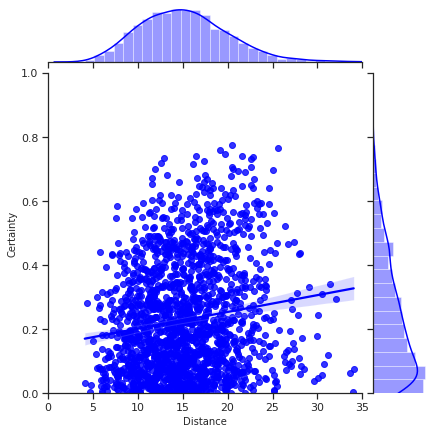

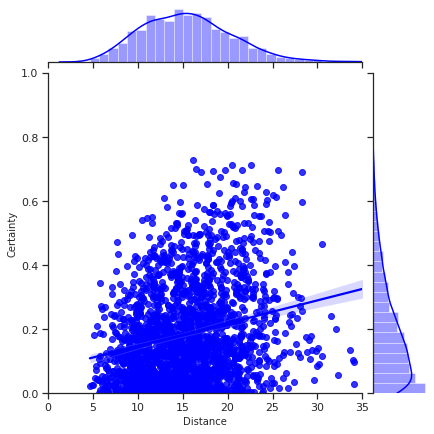

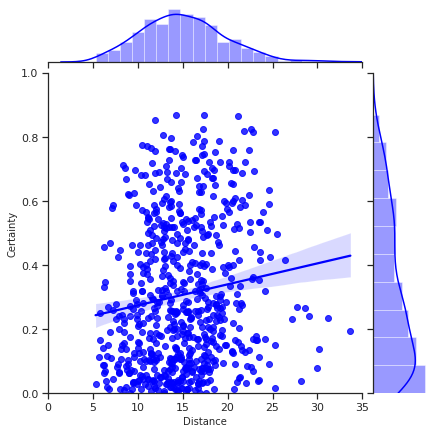

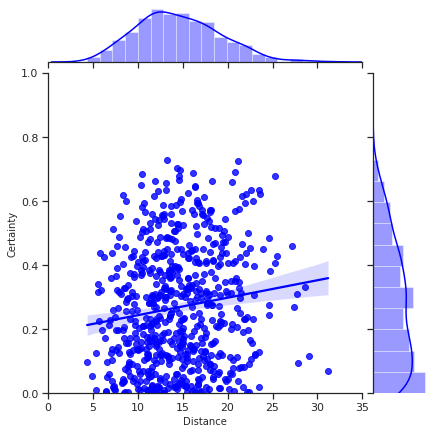

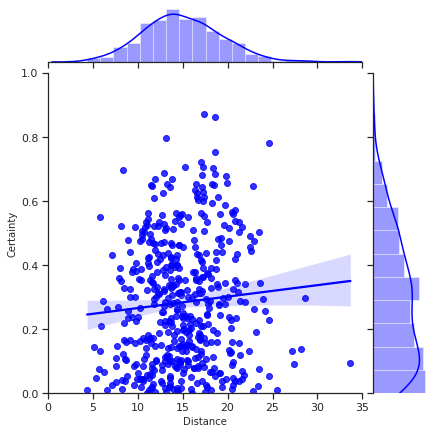

In [21]:
sns.set(style="ticks")
for i in range(6):
    sns.jointplot(distances[i], certainties[i], kind='reg', xlim=(0, 35), ylim=(0,1), color='blue').set_axis_labels('Distance', 'Certainty', fontsize=10)

In [22]:
for model in models:
    print(model.predict_proba(X[3066:3067]))

[[0.50719573 0.49280427]]
[[0.53847347 0.46152653]]
[[0.45321906 0.54678094]]


In [23]:
for model in bad_models:
    print(model.predict_proba(X[3066:3067]))

[[0.85667195 0.14332805]]
[[0.77023246 0.22976754]]
[[0.73232693 0.26767307]]
